In [1]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color
import os 
import cv2
import PIL, PIL.Image
import tensorflow as tf
from tensorflow import keras
import pathlib
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras import backend as K
import numpy as np
import matplotlib.image as mpimg
import os
import random

In [2]:
dtset = tf.keras.utils.image_dataset_from_directory('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupProject\Flowers')

Found 4621 files belonging to 8 classes.


In [ ]:
#convert to numpy array
dtset_iterator = dtset.as_numpy_iterator()
batch = dtset_iterator.next()
dtset_iterator.next()

In [ ]:
#resize the image
def resize_image(image, width, height):
    resized_image = cv2.resize(image, (width, height))
    return resized_image
resize_image(batch[0][0], 256, 256)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14436\700069525.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


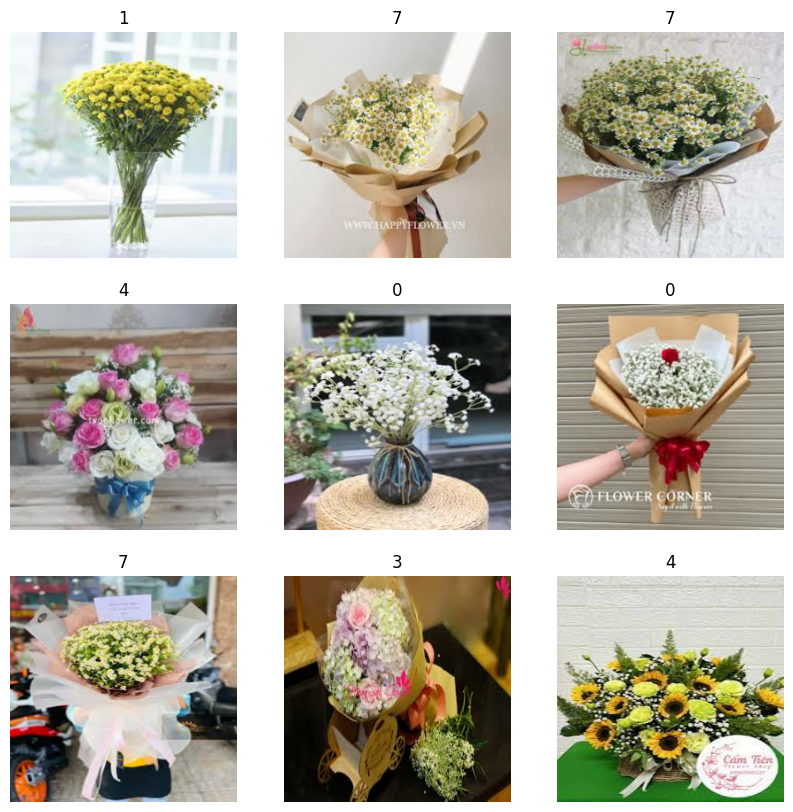

In [5]:
# display 
fix, ax = plt.subplots(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(batch[0][i].astype('uint8'))
    plt.title(batch[1][i])
    plt.axis('off')
plt.show()


In [6]:
#standardlize pixel values using pillow 
def standardlize_image(image):
    normalized_image = (image - np.mean(image)) / np.std(image)
    return normalized_image
standardlize_image(batch[0][0])

#Reshape the image: 
def reshape_image(image):
    reshaped_image = image.reshape(-1)
    return reshaped_image

reshape_image(batch[0][0])

array([245., 250., 253., ..., 221., 234., 240.], dtype=float32)

In [7]:
#split into train and validation , test set
train_size = int(0.6 * len(dtset))
val_size = int(0.2 * len(dtset))
test_size = int(0.2 * len(dtset))
print(train_size, val_size, test_size)

train = dtset.take(train_size)
test = dtset.skip(train_size)
val = test.skip(val_size)
print(len(train), len(test), len(val))



87 29 29
87 58 29


In [18]:
#build model with 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu')) #128 neurons
model.add(Dense(1, activation='sigmoid')) #1 neuron
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# ? 3trieu param ???

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)      

In [17]:
#define model with keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(256, 256, 3)),
    keras.layers.Dense(4621 , activation='relu'),
])

#compile model
model.compile(optimizer='adam',              
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


Epoch 1/10
87/87 [==============================] - 72s 809ms/step - loss: -6921531392.0000 - accuracy: 0.0729 - val_loss: -56430764032.0000 - val_accuracy: 0.0836
Epoch 2/10
87/87 [==============================] - 74s 849ms/step - loss: -1338674905088.0000 - accuracy: 0.0733 - val_loss: -5444059267072.0000 - val_accuracy: 0.0847
Epoch 3/10
87/87 [==============================] - 65s 749ms/step - loss: -24858486374400.0000 - accuracy: 0.0744 - val_loss: -68668037791744.0000 - val_accuracy: 0.0847
Epoch 4/10
87/87 [==============================] - 65s 750ms/step - loss: -179146156146688.0000 - accuracy: 0.0722 - val_loss: -389531287158784.0000 - val_accuracy: 0.0781
Epoch 5/10
87/87 [==============================] - 67s 767ms/step - loss: -745996359303168.0000 - accuracy: 0.0733 - val_loss: -1377088519012352.0000 - val_accuracy: 0.0792
Epoch 6/10
87/87 [==============================] - 66s 761ms/step - loss: -2257997988364288.0000 - accuracy: 0.0726 - val_loss: -3800118344024064.00

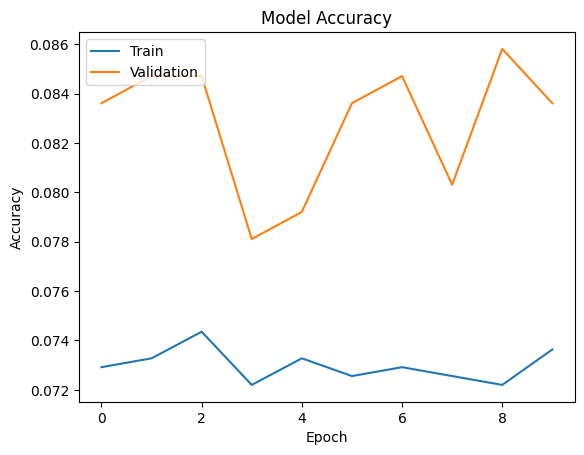

In [19]:
#train the model
logdir = 'logs'
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(train, epochs=10, validation_data=val)
#plot the performance of the model
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
